In [871]:
## importing pandas ,numpy lib

In [872]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import regex as re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [873]:
## reading the csv file named as finalData
df = pd.read_csv("FinalData.csv",index_col=0)
pd.set_option('display.max_columns', None)
df.head()

,Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Primary Camera,Secondary Camera Available,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB) (4...","₹9,799",Galaxy F13,Nightsky Green,Dual Sim,Yes,16.76 cm (6.6 inch),2408 x 1080 Pixels,Android 12,Octa Core,2 GHz,64 GB,4 GB,Yes,50MP + 5MP + 2MP,Yes,8MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
1,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB) (4...","₹9,799",Galaxy F13,Sunrise Copper,Dual Sim,Yes,16.76 cm (6.6 inch),2408 x 1080 Pixels,Android 12,Octa Core,2 GHz,64 GB,4 GB,Yes,50MP + 5MP + 2MP,Yes,8MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) (4...","₹9,799",Galaxy F13,Waterfall Blue,Dual Sim,Yes,16.76 cm (6.6 inch),2408 x 1080 Pixels,Android 12,Octa Core,2 GHz,64 GB,4 GB,Yes,50MP + 5MP + 2MP,Yes,8MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
3,"REDMI 10 (Pacific Blue, 64 GB) (4 GB RAM)","₹9,999",10,Pacific Blue,Dual Sim,Yes,17.02 cm (6.7 inch),1650 x 720 Pixels,Android 11,Octa Core,2.4 GHz,64 GB,4 GB,Yes,50MP + 2MP,Yes,5MP Front Camera,Yes,"4G VOLTE, 4G, 3G, 2G",Yes,Yes,3.5mm,Yes,6000 mAh,203 g,1 Year,4.3,3.6,4.1,3.9,3.9
4,"APPLE iPhone 13 (Starlight, 128 GB)","₹58,999",iPhone 13,Starlight,Dual Sim,Yes,15.49 cm (6.1 inch),2532 x 1170 Pixels,iOS 15,Hexa Core,2.4 GHz,128 GB,4 GB,Yes,Call Wait/Hold,Yes,5MP Front Camera,Yes,"4G VOLTE, 4G, 3G, 2G",Yes,Yes,3.5mm,Yes,6000 mAh,203 g,1 Year,4.7,4.6,4.4,4.7,4.6


In [874]:
print(df.columns,"count=",len(df.columns))

Index(['Name', 'Price', 'Model Name', 'Color', 'SIM Type', 'Touchscreen',
       'Display Size', 'Resolution', 'Operating System', 'Processor Core',
       'Primary Clock Speed', 'Internal Storage', 'RAM',
       'Primary Camera Available', 'Primary Camera',
       'Secondary Camera Available', 'Secondary Camera', 'Full HD Recording',
       'Network Type', 'Bluetooth Support', 'Wi-Fi', 'Audio Jack',
       'GPS Support', 'Battery Capacity', 'Weight', 'Domestic Warranty',
       'Product Rating', 'Camera Rating', 'Battery Rating', 'Display Rating',
       'Design Rating'],
      dtype='object') count= 31


In [875]:
print("number of rows count=",df.shape[0])

number of rows count= 224


In [876]:
## checking for null values in the above data set

In [877]:
df.isnull().sum()


Name                           4
Price                          0
Model Name                     1
Color                          1
SIM Type                       1
Touchscreen                    1
Display Size                   1
Resolution                     1
Operating System               1
Processor Core                 2
Primary Clock Speed            2
Internal Storage               3
RAM                            1
Primary Camera Available       2
Primary Camera                 1
Secondary Camera Available     2
Secondary Camera               2
Full HD Recording              3
Network Type                   1
Bluetooth Support             25
Wi-Fi                          6
Audio Jack                    27
GPS Support                    2
Battery Capacity               1
Weight                         2
Domestic Warranty             25
Product Rating                 0
Camera Rating                  0
Battery Rating                 0
Display Rating                 0
Design Rat

In [878]:
df.loc[df['Name'].isnull() == True]

,Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Primary Camera,Secondary Camera Available,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
89,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,0,G32,Satin Silver,Dual Sim,Yes,16.64 cm (6.55 inch),2400 x 1080 Pixels,Android 12,Octa Core,2.4 GHz,64 GB,4 GB,Yes,50MP + 8MP + 2MP,Yes,16MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,Yes,Yes,5000 mAh,184 g,1 Year,0.0,0.0,0.0,0.0,0.0
163,NaN,0,M4 Pro,Power Black,Dual Sim,Yes,16.33 cm (6.43 inch),2400 x 1080 Pixels,Android 11,Octa Core,2.05 GHz,128 GB,6 GB,Yes,64MP + 8MP + 2MP,Yes,16MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,179.5 g,1 Year,0.0,0.0,0.0,0.0,0.0
198,NaN,0,V27 5G,Noble Black,Dual Sim,Yes,17.22 cm (6.78 Inch),2400 × 1080 Pixels,Android 13,Octa Core,2.8 GHz,128 GB,8 GB,Yes,50MP (OIS) + 8MP + 2MP,Yes,50MP Front Camera,Yes,"5G, 4G, 3G, 2G",Yes,Yes,3.5mm,Yes,4600 mAh,180 g,1 Year,0.0,0.0,0.0,0.0,0.0


In [879]:
df.loc[df['Model Name']=='M4 Pro']

,Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Primary Camera,Secondary Camera Available,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
73,"POCO M4 Pro (Cool Blue, 64 GB) (6 GB RAM)","₹11,999",M4 Pro,Cool Blue,Dual Sim,Yes,16.33 cm (6.43 inch),2400 x 1080 Pixels,Android 11,Octa Core,2.05 GHz,64 GB,6 GB,Yes,64MP + 8MP + 2MP,Yes,16MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,179.5 g,1 Year,4.3,3.9,4.1,4.3,4.1
132,"POCO M4 Pro (Power Black, 128 GB) (8 GB RAM)","₹14,999",M4 Pro,Power Black,Dual Sim,Yes,16.33 cm (6.43 inch),2400 x 1080 Pixels,Android 11,Octa Core,2.05 GHz,128 GB,8 GB,Yes,64MP + 8MP + 2MP,Yes,16MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,179.5 g,1 Year,4.3,3.9,4.0,4.2,4.1
134,"POCO M4 Pro (Cool Blue, 128 GB) (8 GB RAM)","₹14,999",M4 Pro,Cool Blue,Dual Sim,Yes,16.33 cm (6.43 inch),2400 x 1080 Pixels,Android 11,Octa Core,2.05 GHz,128 GB,8 GB,Yes,64MP + 8MP + 2MP,Yes,16MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,179.5 g,1 Year,4.3,3.9,4.0,4.2,4.1
162,"POCO M4 Pro (Power Black, 128 GB) (6 GB RAM)","₹12,999",M4 Pro,Power Black,Dual Sim,Yes,16.33 cm (6.43 inch),2400 x 1080 Pixels,Android 11,Octa Core,2.05 GHz,128 GB,6 GB,Yes,64MP + 8MP + 2MP,Yes,16MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,179.5 g,1 Year,4.3,3.9,4.1,4.3,4.1
163,NaN,0,M4 Pro,Power Black,Dual Sim,Yes,16.33 cm (6.43 inch),2400 x 1080 Pixels,Android 11,Octa Core,2.05 GHz,128 GB,6 GB,Yes,64MP + 8MP + 2MP,Yes,16MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,179.5 g,1 Year,0.0,0.0,0.0,0.0,0.0
177,"POCO M4 Pro (Yellow, 64 GB) (6 GB RAM)","₹11,999",M4 Pro,Yellow,Dual Sim,Yes,16.33 cm (6.43 inch),2400 x 1080 Pixels,Android 11,Octa Core,2.05 GHz,64 GB,6 GB,Yes,64MP + 8MP + 2MP,Yes,16MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,179.5 g,1 Year,4.3,3.9,4.1,4.3,4.1
199,"Infinix HOT 20 5G (Racing Black, 64 GB) (4 GB...","₹11,499",M4 Pro,Yellow,Dual Sim,Yes,16.33 cm (6.43 inch),2400 x 1080 Pixels,Android 11,Octa Core,2.05 GHz,64 GB,6 GB,Yes,64MP + 8MP + 2MP,Yes,16MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,179.5 g,1 Year,4.2,3.6,3.8,3.9,3.9
200,Micromax X412 (Blue),₹964,M4 Pro,Yellow,Dual Sim,Yes,16.33 cm (6.43 inch),2400 x 1080 Pixels,Android 11,Octa Core,2.05 GHz,64 GB,6 GB,Yes,64MP + 8MP + 2MP,Yes,16MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,179.5 g,1 Year,3.9,2.5,3.5,3.3,3.6


In [880]:
## from observing the null values in name is null and the rating and price is also 0, the rest details are the same as the same name model like weight, capacity , warranty etc. thus removing all the data with name having missing value 

In [881]:
df=df.loc[df['Name'].isnull() == False]

In [882]:
## from index 199& 200 we can see that model name is not correctly matching with its phone , for this we need to
## separate company name and extract model name from that 

In [883]:
df['Company Name'] = df['Name'].apply(lambda x: x.split(' ')[0])
df['Model Name'] = df['Name'].apply(lambda x: ' '.join(x.split(' ')[1:]))
model_name_update = df['Model Name'].str.split('(', n=-1, expand=False)

In [884]:
df["Model Name"]=model_name_update.apply(lambda x: x[0])
df['Name']=df['Company Name']
df = df.drop(['Company Name'],axis = 1)
df.rename(columns = {'Name':'Company Name'}, inplace = True)

In [885]:
df=df.reset_index(drop=True)           ## reseting the index

In [886]:
## removing the unit and inch size from display size
df['Display Size'] = df['Display Size'].apply(lambda x: float(x.split(' ')[0]))

In [887]:
df=df.fillna("Missing")

## checking unique value and also encoding them

In [888]:
print("unique elements in Company Name:",df['Company Name'].unique()) 

## MOTOROLA name is repeated

df.iloc[171,0]='MOTOROLA'


unique elements in Company Name: ['SAMSUNG' 'REDMI' 'APPLE' 'MOTOROLA' 'POCO' 'realme' 'Infinix' 'Realme'
 'Nokia' 'Google' 'IQOO' 'Micromax' 'itel' 'LAVA' 'vivo' 'OnePlus'
 'Motorola' 'OPPO' 'Kechaoda' 'Energizer']


In [889]:
print("unique elements in SIM type:",df['SIM Type'].unique())      ## their is no need of cleaning
def sim_encoding(x):
    if x == 'Dual Sim':
        return 1
    elif x == 'Single Sim':
        return 2
    else:
        return 3
df['SIM Type'] = df['SIM Type'].map(sim_encoding)


unique elements in SIM type: ['Dual Sim' 'Single Sim' 'Dual Sim(Nano + eSIM)']


In [890]:
print("unique elements in Touchscreen:",df['Touchscreen'].unique())      ## their is no need of cleaning
encoding = {
    'Yes':1,
    'No':0,
    'Missing':-1
}
df['Touchscreen'] = df['Touchscreen'].map(lambda x: encoding[x])
print("unique elements in Touchscreen:",df['Touchscreen'].unique()) 

unique elements in Touchscreen: ['Yes' 'No']
unique elements in Touchscreen: [1 0]


In [891]:
print("unique elements in Display Size:",df['Display Size'].unique()) ## their is no need of cleaning and encoding

unique elements in Display Size: [16.76 17.02 15.49 17.07 16.51  4.5  17.04 16.64 16.56 17.32 16.71 16.26
 16.33 17.22 15.6  16.94 16.59  6.1   5.08  4.57  7.11 16.74 16.66]


In [892]:
print("unique elements in Operating Systeme:",df['Operating System'].unique())

unique elements in Operating Systeme: ['Android 12' 'Android 11' 'iOS 15' 'iOS 14.2' 'Android 13' 'Symbian'
 'Android 12 Go' 'Android 13 (Go Edition)' 'Android 10' '1' 'RTOS'
 'Series 30+' '0' 'Android' 'iOS 16']


In [893]:
print("unique elements in Processor Core:",df['Processor Core'].unique())      ## their is no need of cleaning
Processor_Core_encoding = {
    'Octa Core':8,
    'Hexa Core':6,
    'Quad Core':4,
    'Missing' : -1,
    'Single Core':1
}
df['Processor Core'] = df['Processor Core'].map(lambda x: Processor_Core_encoding[x])
print("unique elements in Processor Core:",df['Processor Core'].unique()) 

unique elements in Processor Core: ['Octa Core' 'Hexa Core' 'Quad Core' 'Missing' 'Single Core']
unique elements in Processor Core: [ 8  6  4 -1  1]


In [894]:
print("unique elements in Primary Clock Speed:",df['Primary Clock Speed'].unique())     

# their is one missing value and in ghz and in mhz so converting all to ghz and removing unit

def clock_encoding(x):
    if x == "Missing":
        return -1
    elif 'GHz' in x:
        return float(x.split(' ')[0])
    else :
        return float(x.split(' ')[0])/1000
df['Primary Clock Speed'] = df['Primary Clock Speed'].map(clock_encoding)
print("unique elements in Primary Clock Speed after encoding:",df['Primary Clock Speed'].unique())     


unique elements in Primary Clock Speed: ['2 GHz' '2.4 GHz' '1.82 GHz' '0.208 GHz' '2.2 GHz' '2.3 GHz' '1.6 GHz'
 '2.05 GHz' 'Missing' '2.8 GHz' '1.8 GHz' '1.8 MHz' '2.6 GHz' '208 MHz'
 '1 MHz' '1 GHz' '1.2 MHz' '2.2 MHz']
unique elements in Primary Clock Speed after encoding: [ 2.00e+00  2.40e+00  1.82e+00  2.08e-01  2.20e+00  2.30e+00  1.60e+00
  2.05e+00 -1.00e+00  2.80e+00  1.80e+00  1.80e-03  2.60e+00  1.00e-03
  1.00e+00  1.20e-03  2.20e-03]


In [895]:
print("unique elements in Internal Storage:",df['Internal Storage'].unique())

def storage_encoding(x):
    if x == "Missing":
        return -1
    elif 'GB' in x:
        return float(x.split(' ')[0])
    else :
        return float(x.split(' ')[0])/1024
df['Internal Storage'] = df['Internal Storage'].map(storage_encoding)
print("unique elements in Internal Storage after encoding:",df['Internal Storage'].unique())

unique elements in Internal Storage: ['64 GB' '128 GB' '32 GB' '32 MB' 'Missing' '4 MB' '0 GB' '128 MB' '0 MB'
 '3 MB' '64 MB' '256 GB']
unique elements in Internal Storage after encoding: [ 6.4000000e+01  1.2800000e+02  3.2000000e+01  3.1250000e-02
 -1.0000000e+00  3.9062500e-03  0.0000000e+00  1.2500000e-01
  2.9296875e-03  6.2500000e-02  2.5600000e+02]


In [896]:
print("unique elements in RAM:",df['RAM'].unique())

df['RAM'] = df['RAM'].map(storage_encoding)
print("unique elements in RAM after encoding:",df['RAM'].unique())

unique elements in RAM: ['4 GB' '8 GB' '6 GB' '2 GB' '32 MB' '3 GB' '4 MB' '64 MB']
unique elements in RAM after encoding: [4.00000e+00 8.00000e+00 6.00000e+00 2.00000e+00 3.12500e-02 3.00000e+00
 3.90625e-03 6.25000e-02]


In [897]:
print("unique element in Primary Camera Available:", df['Primary Camera Available'].unique())

df['Primary Camera Available'] = df['Primary Camera Available'].map(lambda x: encoding[x])
print("unique elements in Primary Camera Available after encoding:",df['Primary Camera Available'].unique()) 

unique element in Primary Camera Available: ['Yes' 'No' 'Missing']
unique elements in Primary Camera Available after encoding: [ 1  0 -1]


In [898]:
print("unique element in Primary Camera:", df['Primary Camera'].unique())
 

unique element in Primary Camera: ['50MP + 5MP + 2MP' '50MP + 2MP' 'Call Wait/Hold' 'Video Call Support'
 'Speaker Phone' '12MP + 12MP' '64MP + 2MP' '8MP Rear Camera'
 '50MP Rear Camera' '50MP + 8MP + 2MP' '108MP + 2MP' '8MP Dual Camera'
 'Network Type' '13Mp + AI Lens' '50MP + 8MP' '13MP Rear Camera'
 '64MP + 8MP + 2MP' 'Phone Book' 'Hands Free'
 '50 MP + 2 MP Depth Lens + AI Lens' '12.2MP + 12MP' '50 MP + 2 MP + QVGA'
 '13MP + 2MP + 2MP' '50MP (OIS) + 8MP + 2MP' '50MP + 2MP + 2MP'
 '0.3MP Rear Camera' '50MP + AI Lens' '1.3MP Rear Camera'
 '50MP + 2MP Depth Sensor + 2MP Macro Sensor' '64MP Rear Camera'
 '50MP + 0.3MP + 0.3MP' '48MP + 8MP + 2MP'
 '108MP + 2MP (Depth) + 2MP (Macro)']


In [899]:
check_available = df.loc[df['Primary Camera Available'] == 0]
check_available.sample(n=3,replace = False)

,Company Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Primary Camera,Secondary Camera Available,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
167,Nokia,"₹2,099",125 TA-1253 DS,White,1,0,6.10,320 x 240 Pixels,Series 30+,8,0.0012,0.003906,0.003906,0,1.3MP Rear Camera,No,50MP Front Camera,No,2G,No,No,3.5mm,No,1020 mAh,91.3 g,1 Year,4.0,2.7,3.6,3.6,3.6
171,MOTOROLA,"₹1,424",a10,Rose Gold,1,0,4.57,160 x 128 Pixels,0,8,2.2000,0.000000,0.003906,0,64MP Rear Camera,No,8MP Front Camera,No,2G,Yes,No,3.5 mm,No,1750 mAh,81.9 g,2 Year,4.2,2.9,4.2,3.8,4.0
159,SAMSUNG,"₹2,098",Guru Music 2,White,1,0,5.08,128 x 160$$Pixels,1,1,0.2080,-1.000000,4.000000,0,50MP + 2MP,No,0MP Front Camera,No,2G,Yes,No,3.5,No,800 mAh,74.98 g,0,4.3,2.9,4.1,3.9,4.0


In [900]:
check_rear_camera = df.loc[df['Primary Camera'] == 'Speaker Phone']
check_rear_camera.sample(n=2,replace =False)

,Company Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Primary Camera,Secondary Camera Available,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
13,Infinix,"₹8,199",HOT 30i,Pink,1,1,15.49,2532 x 1170 Pixels,iOS 15,6,2.4,128.0,4.0,1,Speaker Phone,Yes,12MP Front Camera,Yes,"5G, 4G, 3G, 2G",Yes,Yes,3.5mm,Yes,6000 mAh,173 g,1 Year,4.4,0.0,0.0,0.0,0.0
101,realme,"₹8,999",C33,Blue,1,1,15.49,2532 x 1170 Pixels,iOS 15,6,2.3,128.0,4.0,1,Speaker Phone,Yes,8MP Front Camera,Yes,"4G, 3G, 2G",Missing,Yes,Missing,Yes,6000 mAh,0.192 g,Missing,4.4,3.6,4.0,3.9,4.2


In [901]:
## we can observe from the data that primary Camera Availability is not matching with the camera propert fully so need to solve this
## using this Primary Camera Availability feature only for camera feature

In [902]:
def update_Primary_camera_avail(x):
    if x in ['Call Wait/Hold','Video Call Support','Speaker Phone','Network Type','Phone Book','Hands Free']:
        return 0
    else:                                                       ## So 1 only when it does not matches with the above list
        return 1
df['Primary Camera Available'] = df['Primary Camera'].map(update_Primary_camera_avail)
df.sample( n =5 ,replace = False)

,Company Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Primary Camera,Secondary Camera Available,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
39,MOTOROLA,"₹12,999",g52,Metallic White,1,1,16.76,2460 x 1080 Pixels,Android 12,8,2.40,128.0,6.0,1,50MP + 8MP + 2MP,Yes,16MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,Yes,Yes,5000 mAh,169 g,1 Year,4.2,3.5,4.2,4.4,4.2
31,realme,"₹5,999",C30,Denim Black,1,1,16.51,1600 x 720 Pixel,Android 11,8,1.82,32.0,2.0,1,8MP Rear Camera,Yes,5MP Front Camera,Yes,"4G VOLTE, 4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,182 g,1 Year,4.2,3.4,3.9,3.8,3.9
101,realme,"₹8,999",C33,Blue,1,1,15.49,2532 x 1170 Pixels,iOS 15,6,2.30,128.0,4.0,0,Speaker Phone,Yes,8MP Front Camera,Yes,"4G, 3G, 2G",Missing,Yes,Missing,Yes,6000 mAh,0.192 g,Missing,4.4,3.6,4.0,3.9,4.2
98,realme,"₹9,999",C33,Blue,1,1,15.49,2532 x 1170 Pixels,iOS 15,6,2.30,128.0,4.0,0,Speaker Phone,Yes,8MP Front Camera,Yes,"4G, 3G, 2G",Missing,Yes,Missing,Yes,6000 mAh,0.192 g,Missing,4.4,3.6,4.0,3.9,4.2
110,POCO,"₹11,999",M4 5G,Blue,1,1,15.49,2532 x 1170 Pixels,iOS 15,6,2.30,128.0,4.0,0,Speaker Phone,Yes,8MP Front Camera,Yes,"4G, 3G, 2G",Missing,Yes,Missing,Yes,6000 mAh,0.192 g,Missing,4.2,3.5,3.9,3.8,3.9


In [903]:
print("unique element in Secondary Camera:", df['Secondary Camera'].unique())
Secondary_camera = df['Secondary Camera'].apply(lambda x: x.split('MP')[0])
print(Secondary_camera.unique())
def front_camera(x):
    if x == 'Missing':
        return -1
    else :
        return float(x)

df['Secondary Camera'] = Secondary_camera.map(front_camera)  ## all Value are in MP

unique element in Secondary Camera: ['8MP Front Camera' '5MP Front Camera' '12MP Front Camera'
 '13MP Front Camera' '0MP Front Camera' '16MP Front Camera'
 '0.3MP Front Camera' '50MP Front Camera' 'Missing']
['8' '5' '12' '13' '0' '16' '0.3' '50' 'Missing']


In [904]:
print("unique element in Secondary Camera Available:", df['Secondary Camera Available'].unique())

df = df.drop('Secondary Camera Available' , axis = 1)  ## dropping this column as it is not necessary because we are using the Secondary Camera

unique element in Secondary Camera Available: ['Yes' 'No' 'Missing']


In [905]:
print("unique element in Full HD Recording:", df['Full HD Recording'].unique())

df['Full HD Recording'] = df['Full HD Recording'].map(lambda x: encoding[x])

unique element in Full HD Recording: ['Yes' 'No' 'Missing']


In [906]:
df['Network Type'] = df['Network Type'].apply(lambda x: x.split(',')[0])
def network(x):
    if 'volte' in x:
        return 4.1
    else :
        return x
df['Network Type'] = df['Network Type'].map(network)
df['Network Type'] =  df['Network Type'].apply(lambda x: float(x.split('G')[0]))


In [907]:
print("unique element in Bluetooth Support:", df['Bluetooth Support'].unique())
print("unique element in Wi-Fi:", df['Wi-Fi'].unique())
print("unique element in GPS Support:", df['GPS Support'].unique())
df['Bluetooth Support'] = df['Bluetooth Support'].map(lambda x: encoding[x])
df['Wi-Fi'] = df['Wi-Fi'].map(lambda x: encoding[x])
df['GPS Support'] = df['GPS Support'].map(lambda x: encoding[x])

unique element in Bluetooth Support: ['Yes' 'No' 'Missing']
unique element in Wi-Fi: ['Yes' 'No' 'Missing']
unique element in GPS Support: ['Yes' 'No' 'Missing']


In [908]:
print("unique element in Audio Jack:", df['Audio Jack'].unique())  ## their is same value written defferently need to clean

def Audio_Jack(x):
    if '3.5' in x:
        return 1
    elif 'Yes' in x:
        return 1
    else :
        return -1
df['Audio Jack'] = df['Audio Jack'].map(Audio_Jack)

unique element in Audio Jack: ['3.5mm' 'Yes' 'Missing' '3.5 mm' '3.5']


In [909]:
print(df['Battery Capacity'].unique())

df['Battery Capacity'] = df['Battery Capacity'].apply(lambda x: int(x.split(' ')[0]))  ## in mAh unit

['6000 mAh' '5000 mAh' '800 mAh' '4410 mAh' '1000 mAh' '1750 mAh'
 '2500 mAh' '1020 mAh' '4600 mAh' '620 mAh' '400 mAh']


In [910]:
print(df['Weight'].unique())

def weight(x):
    if 'Missing' in x:
        return -1
    elif '0.192 g' in x:
        return float(x.split(' ')[0])*1000
    else :
        return float(x.split(' ')[0])
df['Weight'] = df['Weight'].map(weight)  ## in gram unit

['207 g' '203 g' '173 g' '194 g' '189.5 g' '205 g' '182 g' '51 g' '192 g'
 '169 g' '180 g' '184 g' '190 g' '210 g' '200 g' '195 g' '179.5 g' '220 g'
 '0.192 g' '178 g' '198 g' '186 g' '188 g' '187 g' '181 g' '74.98 g'
 '204 g' '109 g' '110 g' '90.5 g' '91.3 g' '201 g' '81.9 g' '189 g'
 'Missing' '172 g' '72 g']


In [911]:
print("unique element in Domestic Warranty:", df['Domestic Warranty'].unique())

def Domestic_Warranty(x):
    if '1 Year' in x:
        return 1
    elif '12 Months' in x:
        return 1
    elif '2 Year' in x:
        return 2
    else:
        return -1
df['Domestic Warranty'] = df['Domestic Warranty'].map(Domestic_Warranty)

unique element in Domestic Warranty: ['1 Year' 'Missing' '0' '12 Months' '2 Year']


In [912]:
print("unique element in Product Rating:", df['Product Rating'].unique())

unique element in Product Rating: [4.4 4.3 4.7 4.1 4.2 4.8 4.6 4.  4.5 3.9 3.8]


In [913]:
print("unique element in Camera Rating:", df['Camera Rating'].unique())

unique element in Camera Rating: [3.7 3.6 4.6 3.4 0.  3.2 4.5 3.9 3.  3.3 3.5 4.1 4.  3.1 3.8 4.4 2.6 2.9
 2.5 2.7]


In [914]:
print("unique element in Battery Rating:", df['Battery Rating'].unique())

unique element in Battery Rating: [4.2 4.1 4.4 4.  0.  3.9 3.7 3.8 4.3 3.6 3.5 3.4 3. ]


In [915]:
print("unique element in Display Rating:", df['Display Rating'].unique())

unique element in Display Rating: [4.  3.9 4.7 3.8 0.  4.1 3.6 4.4 4.2 3.7 4.3 4.6 3.3 3.5 3.4]


In [916]:
print("unique element in Design Rating:", df['Design Rating'].unique())

unique element in Design Rating: [4.  3.9 4.6 0.  4.4 4.3 3.7 3.8 4.2 4.1 4.5 3.6 4.7 3.5]


In [917]:
print("unique element in Price:", df['Price'].unique())

df['Price'] = df['Price'].apply(lambda x: float(x.split('₹')[1].replace(',', ''))) # in rupees

unique element in Price: ['₹9,799' '₹9,999' '₹58,999' '₹11,999' '₹5,749' '₹8,199' '₹7,499' '₹7,749'
 '₹43,999' '₹13,999' '₹10,999' '₹14,490' '₹5,999' '₹5,549' '₹1,299'
 '₹6,999' '₹12,999' '₹8,499' '₹15,999' '₹19,999' '₹18,999' '₹6,549'
 '₹6,499' '₹8,299' '₹11,442' '₹9,499' '₹16,499' '₹15,990' '₹6,480'
 '₹10,499' '₹8,999' '₹2,566' '₹12,265' '₹13,499' '₹24,999' '₹28,999'
 '₹5,799' '₹25,999' '₹16,799' '₹14,999' '₹16,999' '₹1,150' '₹2,190' '₹932'
 '₹1,460' '₹999' '₹1,401' '₹1,165' '₹11,499' '₹1,309' '₹2,649' '₹2,098'
 '₹1,749' '₹2,499' '₹989' '₹965' '₹32,999' '₹1,610' '₹2,099' '₹19,131'
 '₹899' '₹1,424' '₹2,647' '₹12,499' '₹909' '₹8,490' '₹71,999' '₹8,694'
 '₹1,210' '₹16,076' '₹964' '₹21,499' '₹1,549' '₹1,099' '₹1,289' '₹21,962']


In [918]:
print("unique element in Resolution:", df['Resolution'].unique())

unique element in Resolution: ['2408 x 1080 Pixels' '1650 x 720 Pixels' '2532 x 1170 Pixels'
 '1792 x 828 Pixels' '2400 x 1080 Pixels' '1600 x 720 Pixel'
 '160 x 128 Pixels' '2460 x 1080 Pixels' '2400 x 1080 Pixel'
 '1600 x 720 Pixels' '720 X 1640 Pixels' '1640 x 720 Pixels'
 '2400 x 1080 PIxels' '1600 x720 Pixels' '240x320$$Pixels'
 '128 x 160 Pixels' '320 x 240$$Pixels' '320 x 240 Pixels'
 '160 x 128$$pixel' '1080 x 2408 Pixels' '128 x 160$$Pixels'
 '320 x 240$$pixel' '240 x 320$$pixel' '240x320' '2400 × 1080 Pixels'
 '320x240 Pixels' '2412 x 1080 Pixels' '128*160' '1612 x 720 Pixels'
 '1600X700 Pixels' '320 x 480$$Pixels' '1080x2400 Pixels'
 '2400x1080 Pixels']


In [919]:

# Split the 'Resolution' column into 'resolution_x' and 'resolution_y'
df[['resolution_x', 'resolution_y']] = df['Resolution'].str.split(' x ', expand=True)

# Extract the resolution values using regular expressions
resolution_values = df['Resolution'].str.extract(r'(\d+)\D+(\d+)', expand=True)
df['resolution_x'] = resolution_values[0].astype(float)
df['resolution_y'] = resolution_values[1].astype(float)
df = df.drop('Resolution',axis = 1)

## Plotting average price vs company name

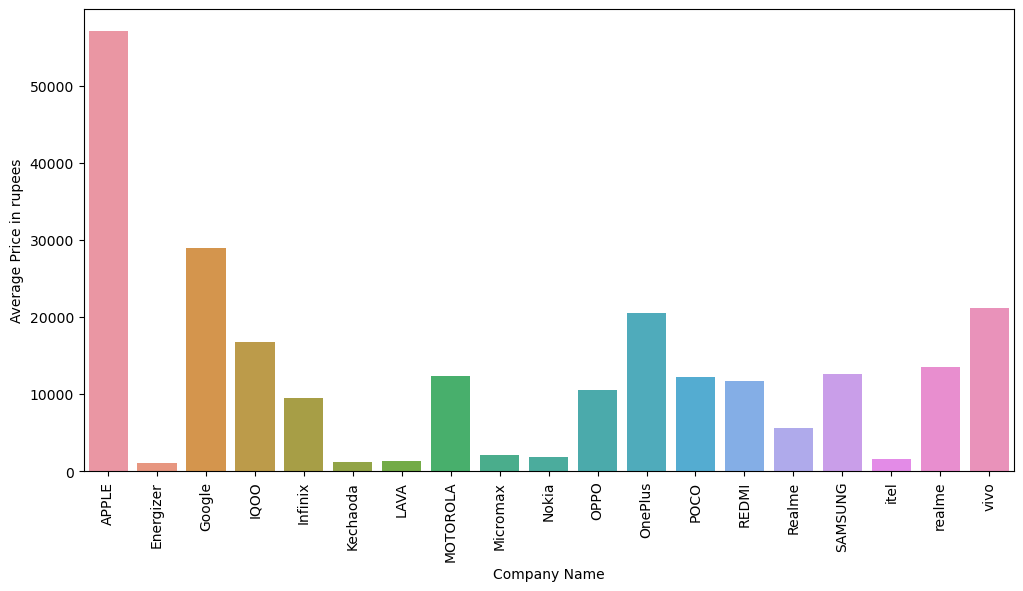

In [920]:

avg_price_name = df.groupby('Company Name')['Price'].mean()
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,6))
ax = sns.barplot(y = avg_price_name.values,x = avg_price_name.index , data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Average Price in rupees')
plt.show()

In [921]:
# we can see company name matters in deciding price of a phone as it adding a brand value by its name
# since we are interested on the people choice of brand selection we use target encoding for Company Name

encoder_ce = ce.TargetEncoder(cols='Company Name')
encoder_ce.fit(df.loc[:,'Company Name'],df.loc[:,'Price'])
df['Company Name'] = encoder_ce.transform(df['Company Name'])


In [922]:
## ignoring color aslo for training ml as it does not affect the price range of mobile
## we can see that for price for a phone and its demand arises due to brand and the features not by model name so ignoring it for ml 

## plotting Average price Vs Operating System

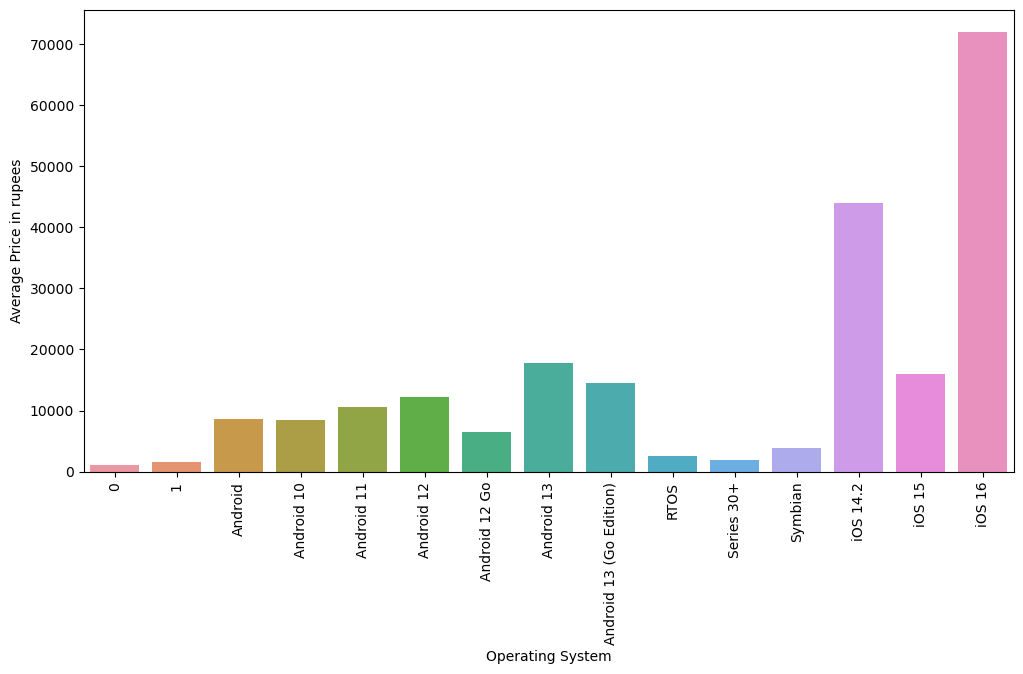

In [923]:
avg_price_os = df.groupby('Operating System')['Price'].mean()
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,6))
ax = sns.barplot(y = avg_price_os.values,x = avg_price_os.index , data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Average Price in rupees')         ## we can see that price is depending on operating system
plt.show()

In [924]:
encoder_te = ce.TargetEncoder(cols='Operating System')
encoder_te.fit(df.loc[:,'Operating System'],df.loc[:,'Price'])
df['Operating System'] = encoder_te.transform(df['Operating System'])

In [925]:
df.sample( n =5 ,replace = False)

,Company Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Primary Camera,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating,resolution_x,resolution_y
174,12375.370345,11999.0,M4 Pro,Yellow,1,1,16.33,10748.052821,8,2.05,64.0,6.0,1,64MP + 8MP + 2MP,16.0,1,4.0,1,1,1,1,5000,179.5,1,4.3,3.9,4.1,4.3,4.1,2400.0,1080.0
191,12375.370345,16999.0,X5 5G,Supernova Green,1,1,16.94,12211.655900,8,2.20,128.0,6.0,1,48MP + 8MP + 2MP,13.0,1,2.0,1,1,1,1,5000,188.0,1,4.2,3.3,4.2,4.3,4.0,2400.0,1080.0
99,12534.878421,7749.0,e13,Blue,1,1,15.49,15896.567854,6,2.30,128.0,4.0,0,Speaker Phone,8.0,1,4.0,-1,1,-1,1,6000,192.0,-1,4.0,3.1,4.0,3.7,4.0,2532.0,1170.0
47,12285.459722,6499.0,A1+,Light Blue,1,1,16.56,11972.200356,4,2.00,32.0,2.0,1,8MP Rear Camera,5.0,1,4.0,1,1,1,1,5000,192.0,1,4.2,3.2,3.9,3.8,3.7,1600.0,720.0
104,9915.560627,2566.0,150 DS 2020,Blue,1,1,15.49,15896.567854,6,2.30,128.0,4.0,0,Speaker Phone,8.0,1,4.0,-1,1,-1,1,6000,192.0,-1,4.1,3.1,3.6,3.7,3.7,2532.0,1170.0


## Third task 

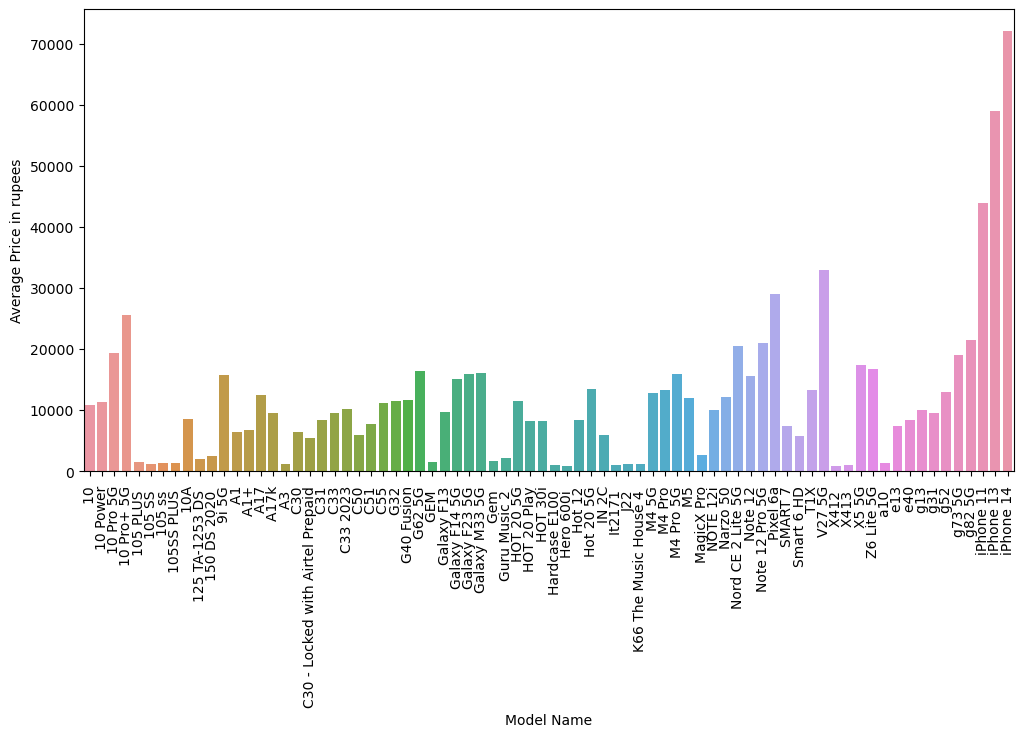

In [926]:

avg_price_model = df.groupby('Model Name')['Price'].mean()
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,6))
ax = sns.barplot(y = avg_price_model.values,x = avg_price_model.index , data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Average Price in rupees')         ## we can see that price is depending on operating system
plt.show()

In [927]:
df.isnull().sum()

Company Name                0
Price                       0
Model Name                  0
Color                       0
SIM Type                    0
Touchscreen                 0
Display Size                0
Operating System            0
Processor Core              0
Primary Clock Speed         0
Internal Storage            0
RAM                         0
Primary Camera Available    0
Primary Camera              0
Secondary Camera            0
Full HD Recording           0
Network Type                0
Bluetooth Support           0
Wi-Fi                       0
Audio Jack                  0
GPS Support                 0
Battery Capacity            0
Weight                      0
Domestic Warranty           0
Product Rating              0
Camera Rating               0
Battery Rating              0
Display Rating              0
Design Rating               0
resolution_x                0
resolution_y                0
dtype: int64

In [928]:
cleaned = df.iloc[:, [0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,30]]


In [938]:
## storing the Cleaned data file

In [939]:
cleaned.to_csv('phone.csv',index = False)

## reading cleaned data and training it for Predicting price of phone

In [930]:
mobile = pd.read_csv('phone.csv')
mobile.sample(n=5,replace = False)

,Company Name,Price,SIM Type,Touchscreen,Display Size,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating,resolution_x,resolution_y
24,13504.550843,13999.0,1,1,17.07,15654.532648,8,2.0,128.0,8.0,1,8.0,1,2.0,1,1,1,1,5000,189.5,1,4.4,3.9,4.2,4.2,4.3,2400.0,1080.0
52,12534.878421,8499.0,1,1,15.49,15896.567854,6,2.2,128.0,4.0,0,5.0,1,2.0,1,1,1,1,5000,192.0,1,4.2,3.5,4.0,3.8,3.9,2532.0,1170.0
77,12534.878421,16499.0,1,1,16.64,12211.655900,8,2.2,128.0,8.0,1,16.0,1,5.0,1,1,1,1,5000,184.0,1,4.1,3.5,3.9,4.0,4.0,2400.0,1080.0
215,13961.306914,21962.0,1,1,15.49,15896.567854,6,2.4,128.0,8.0,0,16.0,1,5.0,1,1,1,1,5000,188.0,1,4.3,4.1,4.1,4.2,4.1,2532.0,1170.0
123,12285.459722,6499.0,1,1,17.32,12211.655900,8,2.3,64.0,4.0,0,8.0,1,4.0,1,1,1,1,6000,210.0,1,4.2,3.2,3.9,3.8,3.7,720.0,1640.0


In [931]:
Y = mobile.iloc[:,1]
X = mobile.drop('Price',axis = 1)

In [932]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [933]:
## scaling the data

In [934]:
# Create a scaler object

scaler = MinMaxScaler()
Scaler = MinMaxScaler()

# Fit the scaler on the training data

scaler.fit(X_train)
Scaler.fit(X_test)

# Transform the training data with feature names

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(Scaler.transform(X_test), columns=X_test.columns)

In [935]:
scaler.feature_range

(0, 1)

In [936]:
X_train_scaled.head()

,Company Name,SIM Type,Touchscreen,Display Size,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating,resolution_x,resolution_y
0,0.256264,0.0,1.0,0.980499,0.796418,1.000000,0.789474,0.501946,1.000000,1.0,0.176471,1.0,0.0,1.0,1.0,1.0,1.0,0.814126,0.861991,0.666667,0.6,0.847826,0.954545,0.893617,0.914894,0.945092,0.417544
1,0.175637,0.0,1.0,0.857254,0.835277,0.777778,0.894737,0.501946,0.499756,0.0,0.254902,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.787330,0.666667,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.457018
2,0.175637,0.0,1.0,0.952418,0.243667,1.000000,0.842105,0.501946,0.749878,1.0,0.176471,1.0,1.0,1.0,1.0,1.0,1.0,0.814126,0.909502,0.666667,0.4,0.760870,0.886364,0.808511,0.829787,0.945092,0.417544
3,0.000000,0.0,0.0,0.124805,0.000000,1.000000,1.000000,0.003906,0.000000,1.0,0.274510,0.5,0.0,0.5,0.5,1.0,0.5,0.074349,0.417647,0.666667,0.2,0.586957,0.818182,0.765957,0.765957,0.079867,0.049123
4,0.175637,0.0,1.0,0.956318,0.008687,1.000000,0.894737,0.501946,1.000000,1.0,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,0.814126,0.886878,0.666667,0.4,0.782609,0.909091,0.851064,0.851064,0.945092,0.417544


## Training the model by RandomForestRegressor

In [942]:
model = RandomForestRegressor(n_estimators=220, random_state=42)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

y_test_prediction = model.predict(X_test_scaled)

print("Accuracy for test data is:", r2_score(y_test, y_test_prediction)*100)


Accuracy for test data is: 96.37408766376873


## Accuracy for test data is: 96.37408766376873%


## Plotting Predicted Price vs Actual Price

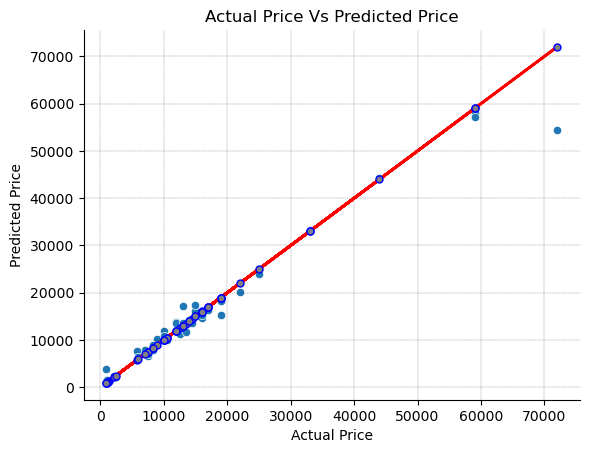

In [957]:
ax = sns.scatterplot(x=y_test, y=y_test_prediction)
ax.grid(color = 'black',linestyle = '--',linewidth=.3,alpha=.5)
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
ax.set_title('Actual Price Vs Predicted Price')
fs = 14
lw = 2
ms = 5

plt.plot(y_test, y_test,linestyle= '-',linewidth = lw,color ='red',marker='o',markersize = ms,markeredgecolor='blue',markerfacecolor='gray')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()